### SVD - ekstrakcja cech (reprezentacja w innej przestrzeni)
#### dzieki svd dowiemy sie ktore wymiary sa nieistotne i mozna je usunac

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

[]

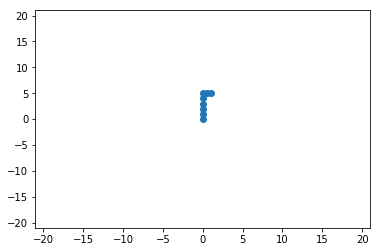

In [5]:
x = np.array([[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0.5,5],[1,5]])
plt.scatter(x[:,0],x[:,1])
plt.xlim(-21,21)
plt.ylim(-21,21)
plt.plot()

In [8]:
def plot_transform_xa(x, a):
    """
    wizualizacja mnozenia x * a
    """
    
    print(a)
    y = np.dot(x,a)
    
    plt.figure(figsize=(15,3.4))
    
    plt.subplot(1,4,1)
    plt.scatter(x[:,0],x[:,1])
    plt.xlim(-21,21)
    plt.ylim(-21,21)
    
    plt.subplot(1,4,2)
    plt.scatter(y[:,0],y[:,1])
    plt.xlim(-21,21)
    plt.ylim(-21,21)
    
    plt.subplot(1,4,3)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.arrow(0,0,1,0, head_width=0.2, head_length=0.2, fc="red", ec="red")
    plt.arrow(0,0,0,1, head_width=0.2, head_length=0.2, fc="red", ec="red")
    
    plt.subplot(1,4,4)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.arrow(0,0,a[0,0],a[0,1], head_width=0.2, head_length=0.2, fc="red", ec="red")
    plt.arrow(0,0,a[1,0],a[1,1], head_width=0.2, head_length=0.2, fc="red", ec="red")
    
    plt.show()

[[2 0]
 [0 2]]


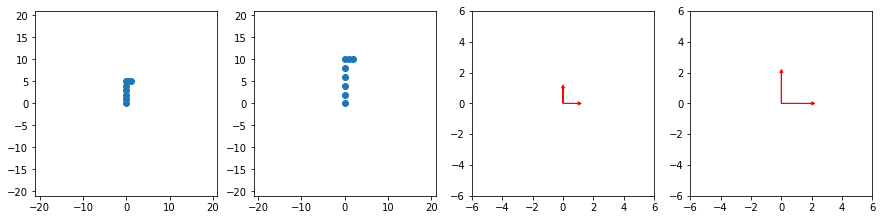

In [23]:
# macierz diagonalna skaluje dane
a = np.diag([2,2])
plot_transform_xa(x, a)

In [34]:
t = np.pi/6
a = np.array([[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]])
a

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [35]:
# macierz ortogonalna to taka ktora po przemnozeniu przez transponowana daje macierz jednostkowa
np.dot(a.T,a)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [38]:
# wyznacznik macierzy
np.linalg.det(a)

1.0

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


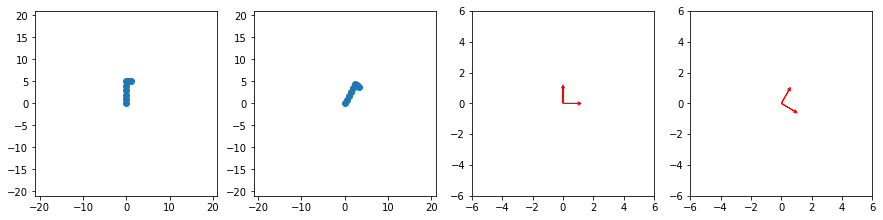

In [39]:
# macierz obrotu to macierz ortogonalna i ma wyznacznik rowny 1
plot_transform_xa(x,a)

[[ 1.         -1.73205081]
 [ 1.73205081  1.        ]]


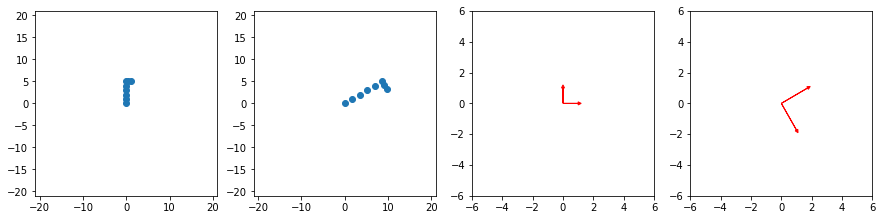

In [41]:
# skalowanie i obrot
t = np.pi/3
a = np.dot(np.diag([2,2]), np.array([[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]]))
plot_transform_xa(x,a)

#### Wykrywanie istotnych cech

In [43]:
# X = U x E x V
# U i V to macierze obrotu
# E to macierz skalujaca dane (elementy diagonali mowia o tym jak wazna jest dana cecha ukryta)
# V to przeniesiona macierz X do innej przestrzeni 
# j-ta kolumna X jest reprezentowana przez j-ta kolumne V
# j-ty wiersz X jest reprezentowany przez i-ty wiersz U

In [54]:
# generujemy dane tak aby w kolumnie 1 i 2 wartosci byly silnie skorelowane
X = np.random.multivariate_normal([0,0,0], np.array([[1,0.999,0], [0.999,1,0], [0,0,1]]), 20)
X

array([[ 0.26385398,  0.19840574, -0.68975475],
       [ 0.43883774,  0.39322676, -0.94364164],
       [ 0.83614156,  0.79823319,  1.15157088],
       [-0.01618329, -0.07638952, -0.04776074],
       [ 0.3751069 ,  0.39973311, -0.61742273],
       [ 1.83135225,  1.85886409, -1.71558306],
       [ 0.6324894 ,  0.66827234,  0.70244643],
       [-0.12552641, -0.11490367,  0.48154611],
       [ 1.0139116 ,  0.9458009 , -0.46285933],
       [ 1.70160283,  1.78094009,  1.24073369],
       [-1.07555278, -1.04443885, -1.01071432],
       [-2.151058  , -2.14027384,  1.45112266],
       [ 1.2108596 ,  1.16566608, -0.26846243],
       [ 1.07186371,  1.12614437,  0.7703191 ],
       [ 0.49251238,  0.45822766, -1.52545773],
       [-1.635925  , -1.58193389,  0.16202866],
       [-1.51291129, -1.59743795,  0.75116356],
       [-0.90542924, -0.89186839, -0.11982937],
       [-1.30566948, -1.25906761, -0.08237946],
       [ 0.56065268,  0.54782754,  0.15268577]])

In [55]:
U, s, V = np.linalg.svd(X)

In [56]:
# s wymaga przekształcenia
S = np.zeros_like(X)
np.fill_diagonal(S, s)
S
# jeden wymiar S odbiega od pozostalych, wykrywamy 2 istotne ukryte wymiary
# S to wymiary V

array([[ 7.17298721,  0.        ,  0.        ],
       [ 0.        ,  3.77392293,  0.        ],
       [ 0.        ,  0.        ,  0.14646511],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [59]:
#sprawdzenie czy svd zadzialalo
np.dot(np.dot(U,S),V)[:3,:]

array([[ 0.26385398,  0.19840574, -0.68975475],
       [ 0.43883774,  0.39322676, -0.94364164],
       [ 0.83614156,  0.79823319,  1.15157088]])

In [60]:
X[:3,:]

array([[ 0.26385398,  0.19840574, -0.68975475],
       [ 0.43883774,  0.39322676, -0.94364164],
       [ 0.83614156,  0.79823319,  1.15157088]])

In [62]:
# zerujemy jeden wymiar ktory uznalismy za nieistotny
S[2,2]=0
S

array([[ 7.17298721,  0.        ,  0.        ],
       [ 0.        ,  3.77392293,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [67]:
# sprawdzenie po wyzerowaniu, wyniki sa podobne
np.dot(np.dot(U,S),V)[:3,:]

array([[ 0.23500622,  0.22720643, -0.6900963 ],
       [ 0.42127022,  0.41076562, -0.94384964],
       [ 0.80967758,  0.82465398,  1.15125756]])

In [68]:
X[:3,:]

array([[ 0.26385398,  0.19840574, -0.68975475],
       [ 0.43883774,  0.39322676, -0.94364164],
       [ 0.83614156,  0.79823319,  1.15157088]])

In [98]:
# zadanie: ile cech ukrytych
a = np.arange(1,301).reshape((50,6))
b = np.random.multivariate_normal([0]*15, np.diag([0.1]*15),6)

x = np.dot(a,b)

# zaokroaglenie do 2 miejsc po przecinku
np.set_printoptions(2,suppress=True)
print(a[:5,:])
print(x[:5,])

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]
[[ -4.6   -2.64   3.42   5.17   4.37  -1.8    1.6   -4.01  -1.33  -0.35
    2.05  -1.58   4.62   0.72  -0.42]
 [-10.37  -3.46  11.34  12.37  11.11  -5.11   1.96 -10.13  -5.85  -1.29
    3.52  -7.06  13.42  -0.45  -0.85]
 [-16.14  -4.28  19.26  19.56  17.85  -8.42   2.33 -16.25 -10.37  -2.24
    5.   -12.54  22.22  -1.63  -1.27]
 [-21.91  -5.1   27.18  26.76  24.58 -11.73   2.69 -22.36 -14.89  -3.19
    6.47 -18.02  31.02  -2.81  -1.7 ]
 [-27.68  -5.93  35.11  33.95  31.32 -15.04   3.05 -28.48 -19.41  -4.14
    7.95 -23.5   39.82  -3.99  -2.13]]


In [99]:
U, s, V = np.linalg.svd(x)

In [100]:
S = np.zeros_like(x)
np.fill_diagonal(S, s)
S

array([[ 3959.73,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ],
       [    0.  ,    15.31,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ],
       [    0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ],
       [    0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ],
       [    0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ],
       [    0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
            0.  ,     0.  ,     0.  ,     0.  ,     0.  ,

In [86]:
U.shape, V.shape, S.shape

((50, 50), (15, 15), (50, 15))

In [93]:
np.dot(np.dot(U,S),V)[:3,:]

array([[  0.56,  -1.48,  -2.1 ,   2.44,   3.77,   4.28,  -3.57,  -0.44,
         -1.43,   2.5 ,  -1.57,   4.99,   1.61,  -2.23,   2.34],
       [  0.2 ,  -5.03,  -5.51,   6.94,   8.28,  12.56,  -8.15,  -4.57,
         -5.35,   6.91,  -4.06,   8.99,   6.88,  -2.76,   1.68],
       [ -0.15,  -8.59,  -8.93,  11.44,  12.78,  20.83, -12.74,  -8.69,
         -9.26,  11.32,  -6.54,  12.99,  12.14,  -3.29,   1.02]])

In [94]:
x[:3,:]

array([[  0.56,  -1.48,  -2.1 ,   2.44,   3.77,   4.28,  -3.57,  -0.44,
         -1.43,   2.5 ,  -1.57,   4.99,   1.61,  -2.23,   2.34],
       [  0.2 ,  -5.03,  -5.51,   6.94,   8.28,  12.56,  -8.15,  -4.57,
         -5.35,   6.91,  -4.06,   8.99,   6.88,  -2.76,   1.68],
       [ -0.15,  -8.59,  -8.93,  11.44,  12.78,  20.83, -12.74,  -8.69,
         -9.26,  11.32,  -6.54,  12.99,  12.14,  -3.29,   1.02]])

In [101]:
# odp: mamy dwie ukryte cechy

In [103]:
# po narysowaniu wykresu macierzy S metoda lokcia wybieramy ktore cechy sa istotne 
# (ale nie jest to takie latwe jak K-Means)

In [104]:
a = np.random.multivariate_normal([0]*3, np.diag([1]*3),100)
b = np.random.multivariate_normal([0]*15, np.diag([0.1]*15),3)

# + np.random... to zaszumienie
x = np.dot(a,b) + np.random.multivariate_normal([0]*15, np.diag([0.1]*15),100)

np.set_printoptions(2,suppress=True)
print(a[:5,:])
print(x[:5,])

[[ 1.72 -0.68 -0.28]
 [ 0.72 -0.8   0.81]
 [ 1.98 -0.48  0.29]
 [-1.18  0.05 -1.82]
 [ 0.37  2.62 -3.21]]
[[-0.13 -1.09  0.61  0.08 -1.18 -0.53 -0.73 -0.56 -1.29 -0.38 -0.34 -0.53
   0.6   0.8  -0.78]
 [-0.5   0.53  0.4   0.37 -0.21 -0.19  0.05 -1.24 -0.46 -0.26  0.26 -0.11
   1.12  1.21 -0.59]
 [ 0.08 -0.05  0.82  0.51 -1.25 -0.96 -0.46 -0.96 -1.04 -0.19 -0.37 -0.79
   0.73  0.95  0.15]
 [-0.37 -0.19 -1.6  -0.18  0.6   0.37  0.67  1.3   0.8   0.79  0.69  0.41
  -0.34 -1.17  0.53]
 [ 0.95 -2.49  0.28 -0.06 -0.65 -1.01  1.13  1.81  1.05 -0.6   0.56  1.75
  -1.97 -2.   -0.86]]


In [105]:
U, s, V = np.linalg.svd(x)

In [111]:
S = np.zeros_like(x)
np.fill_diagonal(S, s)
S[:15,:]

array([[ 14.5 ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,  11.06,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   8.14,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   3.95,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   3.67,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   3.43,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   3.4 ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,  

In [113]:
S[3:,:]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [121]:
# sprawdzenie dla k wymiarów macierzy S (a'la wyzerowanie S poza wymiarem kxk)
k = 3
np.dot(np.dot(U[:,:k],S[:k,:k]),V[:k,:])

array([[ 0.02,  0.03,  0.01, ...,  0.02,  0.02,  0.03],
       [ 0.06,  0.12,  0.36, ...,  0.05,  0.13,  0.11],
       [ 0.03,  0.04,  0.06, ...,  0.02,  0.04,  0.04],
       ..., 
       [ 0.04,  0.04, -0.04, ...,  0.03,  0.03,  0.03],
       [ 0.07,  0.07, -0.04, ...,  0.05,  0.06,  0.06],
       [ 0.07,  0.09,  0.14, ...,  0.05,  0.09,  0.08]])

In [114]:
# zadanie: odszumianie obrazka

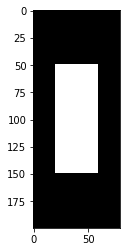

In [116]:
x = np.zeros((200,80))
x[50:150,20:60] = 1

plt.gray()
plt.imshow(x)
plt.show()

(array([  0,   0,   0, ..., 199, 199, 199]), array([ 1,  2,  3, ..., 77, 78, 79]))


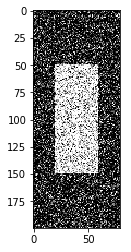

In [152]:
#zaszumiamy:
losowe_indeksy = np.random.choice(2,size=x.shape,p=[0.5,0.5]).nonzero()
print(losowe_indeksy)
x[losowe_indeksy] = x[losowe_indeksy] + np.random.normal(0,0.4,len(losowe_indeksy[0]))
x[x>1] = 1 # zeby pozbyc sie ujemnych
x[x<0] = 0
plt.gray()
plt.imshow(x)
plt.show()

In [153]:
U, s, V = np.linalg.svd(x)

In [154]:
S = np.zeros_like(x)
np.fill_diagonal(S, s)
S

array([[ 54.72,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   9.8 ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   6.24, ...,   0.  ,   0.  ,   0.  ],
       ..., 
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [161]:
k = 2
X = np.dot(np.dot(U[:,:k],S[:k,:k]),V[:k,:])

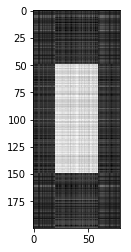

In [162]:
plt.imshow(X)
plt.show()

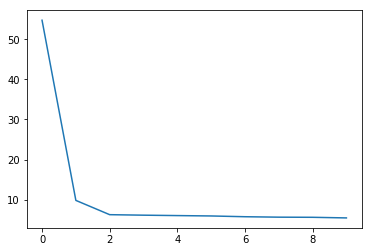

In [168]:
plt.plot(np.arange(10),s[:10])
plt.show()

In [169]:
#zadanie: kompresja obrazka

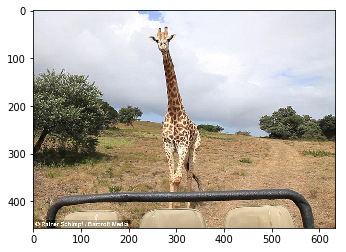

In [212]:
import PIL.Image as Image
im = Image.open('1.jpg')
plt.imshow(im)
plt.show()

In [213]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [214]:
im_r = np.array(im)/255
im_r

array([[[ 0.88,  0.89,  0.93],
        [ 0.88,  0.89,  0.93],
        [ 0.88,  0.89,  0.93],
        ..., 
        [ 0.85,  0.87,  0.89],
        [ 0.85,  0.87,  0.9 ],
        [ 0.85,  0.87,  0.9 ]],

       [[ 0.88,  0.89,  0.93],
        [ 0.88,  0.89,  0.93],
        [ 0.88,  0.89,  0.93],
        ..., 
        [ 0.85,  0.86,  0.89],
        [ 0.85,  0.86,  0.9 ],
        [ 0.85,  0.86,  0.9 ]],

       [[ 0.88,  0.89,  0.93],
        [ 0.88,  0.89,  0.93],
        [ 0.88,  0.89,  0.93],
        ..., 
        [ 0.85,  0.87,  0.89],
        [ 0.85,  0.86,  0.9 ],
        [ 0.84,  0.86,  0.89]],

       ..., 
       [[ 0.64,  0.47,  0.32],
        [ 0.64,  0.47,  0.33],
        [ 0.57,  0.42,  0.26],
        ..., 
        [ 0.6 ,  0.48,  0.37],
        [ 0.53,  0.42,  0.31],
        [ 0.53,  0.42,  0.31]],

       [[ 0.6 ,  0.43,  0.29],
        [ 0.54,  0.37,  0.23],
        [ 0.43,  0.27,  0.13],
        ..., 
        [ 0.6 ,  0.48,  0.38],
        [ 0.51,  0.39,  0.29],
        [ 

In [215]:
im_r.shape

(456, 634, 3)

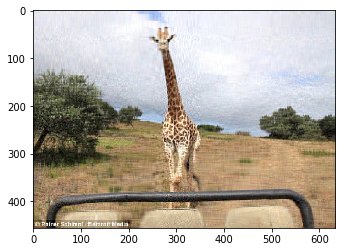

In [249]:
ima = np.empty(im_r.shape)
for i in np.arange(im_r.shape[2]):
    U, s, V = np.linalg.svd(im_r[:,:,i])
    S = np.zeros_like(x)
    np.fill_diagonal(S, s)
    k = 50
    X = np.dot(np.dot(U[:,:k],S[:k,:k]),V[:k,:])
    X[X>1] = 1
    X[X<0] = 0
    ima[:,:,i] = X
plt.imshow(ima)
plt.show()

In [250]:
im_comp = (ima * 255).astype(np.uint8)
result = Image.fromarray(im_comp)
result.save('out.jpg')

In [251]:
im_r.nbytes

6938496

In [252]:
im_comp.nbytes

867312

In [253]:
# zadanie

In [254]:
documents = [
    "morze plaża woda słońce piasek",
    "morze plaża piasek woda",
    "morze plaża słońce",
    "plaża woda piasek",
    "słońce woda plaża",
    "piasek woda",
    "krowa pies papuga",
    "pies kot"
]

In [274]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
dtm = cv.fit_transform(documents)
dtm

<8x9 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [275]:
# macierz rzadka, reprezentacja macierzy gdzie jest bardzo duzo zer a malo innych wartosci
# zamiast trzymac cala macierz przechowujemy w trzech kolumnach pozycje x,y i wartosc [x,y,v]

In [276]:
x = dtm.todense().T
x
# kolumna to dokument

matrix([[0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 0, 0]], dtype=int64)

In [268]:
dtm.getcol(1)

<8x1 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [265]:
cv.get_feature_names()

['kot',
 'krowa',
 'morze',
 'papuga',
 'piasek',
 'pies',
 'plaża',
 'słońce',
 'woda']

In [277]:
U, s, V = np.linalg.svd(x)

In [281]:
S = np.zeros_like(x).astype('float')
np.fill_diagonal(S, s)
S

matrix([[ 3.87,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  1.9 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  1.79,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  1.18,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  1.13,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.68,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.33,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [380]:
# k = 5 # dla k = 5 slabe wyszukiwanie
# k = 4 # najlepsze dopasowanie dla k = 4
k = 2 # dla k = 2 rozroznienie dwoch odrebnych zbiorow dokumentow [:6] i [6:]
x_n = V[:k,:]
x_n

matrix([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25, -0.  ,  0.  ],
        [ 0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.85,  0.53]])

In [371]:
# X = U x S x V.T
# U**-1 x X = S x V.T
# U.T x X = S x V.T
# S**-1 x U.T x X = V.T
# S**-1 x U.T x Q = q

In [372]:
# sprawdzenie x_n
np.dot(np.dot(np.linalg.inv(S[:k,:k]),U.T[:k,:]),x)

matrix([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
        [ 0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.85,  0.53]])

In [373]:
query = ['plaża']
q = cv.transform(query)
q = q.toarray()
q

array([[0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [374]:
q_v = np.dot(np.dot(np.linalg.inv(S[:k,:k]),U.T[:k,:]),q.T)
q_v

matrix([[-0.14],
        [ 0.  ]])

In [375]:
from sklearn.metrics import pairwise_distances # oblicza odleglosc wektorow

In [376]:
pairwise_distances(q_v.T, x_n.T)

array([[ 0.42,  0.34,  0.17,  0.25,  0.22,  0.11,  0.86,  0.54]])

In [377]:
o = np.argsort(np.squeeze(pairwise_distances(q_v.T, x_n.T)))
o

array([5, 2, 4, 3, 1, 0, 7, 6])

In [378]:
np.array(documents)[o]

array(['piasek woda', 'morze plaża słońce', 'słońce woda plaża',
       'plaża woda piasek', 'morze plaża piasek woda',
       'morze plaża woda słońce piasek', 'pies kot', 'krowa pies papuga'], 
      dtype='<U30')

# Zadanie dla chetnych do domu: znalezc slowo najbardziej podobne do ... (np. słońce)

In [386]:
np.dot([[1,2],[3,4]],[1,1])

array([3, 7])